In [85]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Algorithmic complexity</font>")

# <font color='blus'>Imports

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# modules de bases
import os
import sys
import copy

# numpy, scipy, pandas
import numpy as np
import scipy.special as sp
import pandas as pd
import random

from timeit import Timer

# pour la visualisation
from IPython.display import display
from matplotlib import pyplot as plt # import matplotlib.pyplot as plt
# plotly
# seaborn
# altair

import random as rd

# <font color='blus'>Complexity theory

> 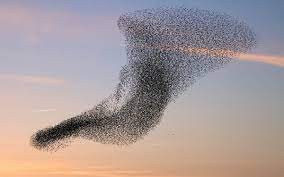

> A system composed of a large number of interacting components, without central control, whose emergent "global'' behavior—described in terms of dynamics, information processing, and/or adaptation —is more complex than can be explained or predicted from understanding the sum of the behavior of the individual components. 
>
> Complex systems are generally capable of adapting to changing inputs/environment and in such cases sometimes referred to as complex adaptive systems.

> 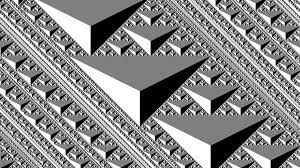

> *Theory of cellular automaton*

>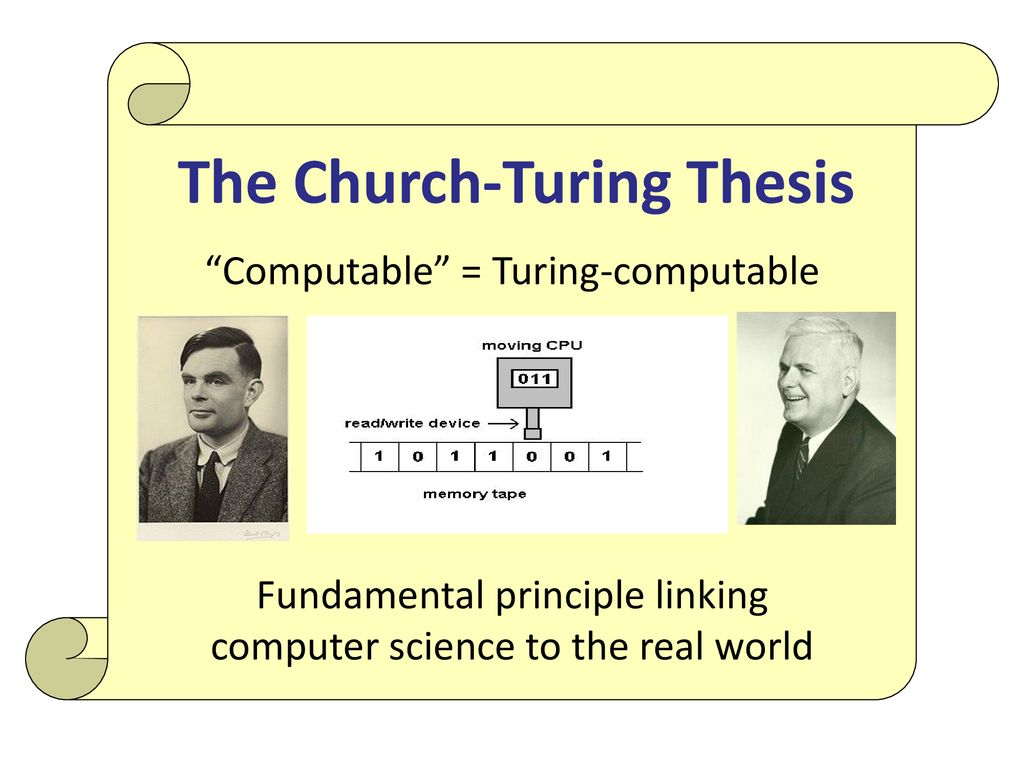

> The Church-Turing thesis : 
>
>**Any function that is "computable" -- that is, that can be computed by an algorithm -- can be computed by a universal Turing machine**

> It is a branch of theoretical computer science.
>
> This branch deals with the necessary resources, memory and time, to compute an algorithmic problem.
>
> Problems are classified into complexity classes: P, NP, ...
>
> Measuring complexity allows to adapt resources to computers tasks and optimize algorithms.
>
> In this course, we will focus on **time** resource. We use a kind of algorithm, particularly adapted to measure this quantity, both the **searching** and **sorting** algorithms.
>

# <font color='blus'>Algorithms over `Python` lists

**Note**: to teach algorithms and illustrate fundamental notions like algorithmic complexities, it is probably better to break python's best practices and avoid its idioms, in short, to use python as a low level programming language.


**Search for an item in a list**

See the [doc](https://ipython.readthedocs.io/en/stable/interactive/magics.html) for the `%time` magic command.

>> `%%time` is a so-called "magic" command of `IPython`.
>>
>> For the whole cell, `%%time` displays the CPU time and the wait time for the result.
>>
>> `%time` displays the CPU time and the wait time for the result of a single statement line.

> The list comprehension below generates a list of 1 million pseudo-random values, ranging from 1 to 10001

In [6]:
%%time
import random as rd
n = int(1e6)
p = int(1e4)
liste_test = [rd.randint(0,p)+1 for _ in range(n)]
print(len(liste_test))

1000000
CPU times: user 1.68 s, sys: 39 ms, total: 1.71 s
Wall time: 1.74 s


> **User CPU time** is the amount of time the processor spends in running application / Python code.
>
> **System CPU Time** is the amount of time the processor spends in running the operating system(i.e., kernel), system libraries.

In [7]:
print(liste_test[:10]) 
min(liste_test), max(liste_test), len(liste_test)

[6212, 8922, 114, 150, 8028, 9540, 6301, 8178, 7698, 1074]


(1, 10001, 1000000)

In [8]:
liste_test.index(7010), liste_test.index(5926), liste_test[-1]

(12344, 2794, 8968)

## <font color='blus'>Searching for an item in a list

> For each value of the list, we retrieve the corresponding index in the list and we thus build the list of indexes.
>
> In the example below, the index associated with the value `'e'` of the list `list_` is `4`.

In [10]:
list_ = ['a', 'b', 'c', 'd', 'e']
print(list_)
list_.index('e')
list_index = [list_.index(l) for l in list_]#
max_index = max(list_index)

element = list_index.index(max_index)# 
print(element, max_index)

['a', 'b', 'c', 'd', 'e']
4 4


In [11]:
list_.index(list_[-1])

4

In [12]:
p

10000

In [13]:
list_index = [liste_test.index(l) for l in range(1,p+1)]
max_index = max(list_index)# Get greater index in the list
element = list_index.index(max_index)# Then we retrieve the value in the list for this index
element

9309

In [14]:
print(list_index[:10])
max_index

[20272, 1780, 2850, 10587, 5619, 30746, 1315, 12192, 5665, 10788]


89209

### <font color='blus'> Naive search

> We go through all the elements of the list and we compare them one by one with the element we are looking for.
>
> A test (`if` control structure) is made on each of the elements

In [15]:
def naive_search(liste,elt):
    for i in range(len(liste)):
        if liste[i] == elt:
            return i
    return -1

> The `%time` statement applies to the cell line.

In [16]:
%time naive_search(liste_test,element)

CPU times: user 1.07 ms, sys: 1e+03 ns, total: 1.07 ms
Wall time: 1.07 ms


12100

> In programming, a test (`if` statement)consumes several processor cycles. This is a costly statement that we avoid inserting in a loop (`for`).

### <font color='blus'> Search with the `enumerate` function

In [17]:
def enumerate_search(liste,elt):
    for i,item in enumerate(liste):
        if item == elt:
            return i
    return -1

In [18]:
%time enumerate_search(liste_test,element)

CPU times: user 1.22 ms, sys: 1e+03 ns, total: 1.23 ms
Wall time: 1.23 ms


12100

> Algorithm implemented into `enumerate_search` function is more optimized than our naive search. This is due to the fact that in naive search, a memory access is performed in the list (`list[i]`) and this access is more expensive than going through the native `enumerate` function to retrieve the elements of the list.
>
> Indeed the memory address `list[i]` must be recalculated at each iteration, which consumes several processor cycles.
>
> **NB : When you need an algorithm, make sure that it has not still alerady been implemented in some Python library.** Native algorithms are often higly optimized.

### <font color='blus'> Searching with the `index` method of the list

In [19]:
def recherche_index(liste,elt):
    return liste.index(elt)

In [20]:
%time recherche_index(liste_test,element)

CPU times: user 198 µs, sys: 1e+03 ns, total: 199 µs
Wall time: 203 µs


12100

> - No loop is used in the search program.
>
> - The element's memory address is calculated and accessed only once.
>
> - No test is done, which saves processor cycle time and highlights, by the way, the cost of an `if` test.
>
> Note that the methods of the classes are optimized in the `C` language. Most algorithms in `Python` are
underlyingly written in the `C` language. The latter is a so-called **low level** language in the sense that it is necessary to understand the organization of the memory of a processor in order to code efficiently.
>
> The level of `C` language is just above assembly language.

### <font color='blus'> Searching in a list using recursion algorithm

> A recursive function is related to recurrent sequences, such as:
>> $U_{n+1} = 2U_n +3$
>
> The recursive function calls itself.

In [21]:
def recursive_search(liste,elt,index=0):
    if liste[0] == elt:
        return index;
    else:
        # Proceed to recursion over the list where 1st element has been removed.
        return recursive_search(liste[1:],elt,index+1)

In [22]:
if False :
    %time recursive_search(liste_test,element)

> The time and resources required to solve an algorithmic problem vary according to the algorithm used.
>
> Enabling recursive search will crash the `Python` kernel, in the sense that the call stack that uses RAM memory will be full before it can exit the recursive process.

> The function below gives the limit depth of recursions.
>
> Using `set` assessor allows to upgrade this limit.
>
> Then, this limit can be changed, but it is not recommended: `sys.setrecursionlimit(124000)`
>
> Using `sys` API (Application Programming Interface), we reach the `system programming` level.

In [23]:
import sys
print(sys.getrecursionlimit())

3000


> To avoid the problem of memory saturation, we will truncate the original list and search for the element at the last index, means, the last position in the list

In [24]:
len(liste_test)
liste_test_troncated = liste_test[:10000]
print(len(liste_test_troncated))
element = liste_test_troncated[-1]
print(element)

10000
3461


In [25]:
%%time 
id = recursive_search(liste_test_troncated,element)
print(liste_test_troncated[id])

3461
CPU times: user 166 ms, sys: 56.9 ms, total: 223 ms
Wall time: 233 ms


> **For a list 100 times smaller, the algorithm time is multiplied by a factor of 100 000.**

# <font color='blus'>Using data structures under `numpy`

> `numpy` is an abbreviation of numerical python. It is a library dedicated to scientific programming.
>
> `numpy` allows you to manipulate, among other things, arrays (vectors in the mathematical sense of the term), matrices (bilinear forms), tensors (multilinear forms), statistics, probabilities.
>
> `numpy` covers areas the `scipy` lib covers.
>
> With `pandas`, `numpy` is one of the most widely used libraries in datascience.
>
> In the following examples, lists are converted to tables.

In [28]:
import numpy as np 

In [29]:
%time test_nparray = np.asarray(liste_test)

CPU times: user 95.7 ms, sys: 4.32 ms, total: 100 ms
Wall time: 107 ms


## <font color='blus'>Generate an array under `numpy`

> An array of type int, with one dimension, n, is generated with random numbers between 1 and 1000.

In [30]:
%%time
n = int(1e6)
test_nparray2 = np.fromfunction(np.vectorize(lambda i: rd.randint(0, 1000)+1), (n,), dtype=int)

CPU times: user 1.99 s, sys: 71.3 ms, total: 2.06 s
Wall time: 2.12 s


## <font color='blus'>Find an element with the `where` method of a `numpy` array

In [31]:
%time np.where(test_nparray == element)

CPU times: user 2.33 ms, sys: 2.17 ms, total: 4.5 ms
Wall time: 6.67 ms


(array([  1113,   5434,   7228,   9999,  16828, 103931, 123264, 140763,
        182157, 194405, 200973, 207162, 210216, 219129, 219165, 223744,
        247037, 278551, 285753, 312386, 313651, 320947, 342735, 358913,
        370919, 375459, 375736, 385304, 397507, 407293, 429427, 434909,
        438045, 446677, 497150, 497224, 500308, 502158, 511979, 526504,
        531449, 599025, 616475, 617111, 617590, 625722, 632989, 633780,
        640690, 652897, 653340, 662194, 665317, 683277, 692831, 695312,
        707065, 720891, 730345, 742911, 747437, 752656, 756118, 771240,
        785631, 815132, 829839, 833465, 848122, 862188, 867548, 878183,
        883080, 895556, 909128, 910179, 926277, 931765, 936510, 941017,
        945244, 957971, 973678, 998681]),)

> We have retrieved the list of all the indices from the array `test_nparray`.
>
> These indices corresponds with the value of `element`.
>
> Note the similarity of the `where` keyword with the languages of the `SQL` family.

In [32]:
print(test_nparray[966692], element)
print(test_nparray[877119], element)

1854 3461
8490 3461


> The `shape` property below gives the dimensions of the array, here to an input.

In [33]:
test_nparray.shape[0]

1000000

In [34]:
np.where(test_nparray == element)[0].shape

(84,)

In [35]:
len(np.where(test_nparray == element)[0])

84

> `np.where` returns a tuple whose first index gives the list of array indices corresponding to the sought element.

## <font color='blus'>Find an element with an iterator from a `numpy` array

> In the next cell, we define an iterator on the array.
>
> An iterator is an object acting as a cursor, which will point to the different indices of a sequence of values or objects. The pointer traverses the addresses of the elements step by step.
>
> An iterator is **inexpensive in memory** and is more general purpose than a list.
>
> The `nd` stem is a contraction of "N-Dimensionnal" and emphasizes numpy's ability to handle multi-dimensional objects, such as matrices.

In [36]:
print(element)
element in test_nparray

3461


True

In [37]:
iterator = np.nditer(test_nparray,flags=['f_index'])
iterator.iternext()

True

In [38]:
%%time
list_index = list()

iterator = np.nditer(test_nparray,flags=['f_index'])
while iterator.iternext():
    if iterator[0] == element:
        list_index.append(iterator.index)


CPU times: user 1.63 s, sys: 9.82 ms, total: 1.63 s
Wall time: 1.66 s


In [39]:
len(list_index), len(np.where(test_nparray ==element)[0])

(84, 84)

In [40]:
iterator.iternext()

False

## <font color='blus'>Dichotomous search in a `numpy` array

> 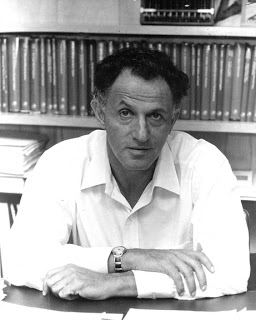

> Here-under is a **dynamic programming** representation of the bubble sort algorithm
>
> (wikipedia)
>> Dynamic programming is both a mathematical optimization method and a computer programming method. The method was developed by **Richard Bellman** (applied mathematician) in the 1950s and has found applications in numerous fields, from aerospace engineering to economics.

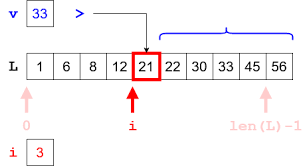

> Also named binary search. 
>
> Principle of research:
> - 1. the list is ordered
> - As long as the element was not found:
     > - 2. the list is divided into two equal parts.
     > - 3. we test if the extreme value of the 1st list corresponds to the searched value
     > - 4. If the test is positive --> STOP
     > - 5. If the test is negative, we seek in which of the two parts of the list the element is found
     > - 6. start again from 2.
>

In [41]:
def dichotomous_search(liste, valeur):
    first = 0
    last  = len(liste)-1
    index = -1
    count = 0
    while (first <= last) and (index == -1):
        count += 1
        mid = (first+last)//2 # La liste est découpée en deux
        if liste[mid] == valeur: # On regarde si la valeur extrème de la liste correspond a la valeur, STOP
            index = mid
        else:
            # Search for array in which element stands in.
            if valeur < liste[mid]:
                last = mid -1
            else:
                first = mid +1
    #print("nombre d'itérations:",count)
    return index

> This search requires ordering the elements of an array. The ordering algorithm needs to be taken into account in order to assess the time consumed by algorithm.

In [42]:
len(liste_test)

1000000

In [43]:
%time liste_ordonnee = sorted(liste_test)

CPU times: user 353 ms, sys: 6.44 ms, total: 359 ms
Wall time: 363 ms


In [44]:
liste_ordonnee[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [45]:
%time dichotomous_search(liste_ordonnee, element)

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 16.7 µs


345702

> While taking into account all involved algorithms

In [46]:
%time dichotomous_search(sorted(liste_test),element)

CPU times: user 406 ms, sys: 4.19 ms, total: 411 ms
Wall time: 420 ms


345702

## <font color='blus'>Representation of the complexity of an algorithm

We can carry out an experimental study of the complexity of a search algorithm in a list, by varying the size of the lists analyzed and calculating the average CPU calculation time and by graphically representing this calculation time as a function of the size of the lists analyzed.

### <font color='blus'>Implementation of the measure

In [47]:
M = 1000
ELT = 500
"dichotomous_search(liste_ordonnee[:{}],{})".format(M, ELT)

'dichotomous_search(liste_ordonnee[:1000],500)'

In [48]:
M   = 1000
ELT = 500
N   = 100
# The statement that will be executed for the measurement
statement = "dichotomous_search(liste_ordonnee[:{}],{})".format(M, ELT)

# import of the functions and data necessary for the execution of the instruction.
# Note that __main__ instructs Python interpreter that the notebook is the entry point.
setup = "from __main__ import dichotomous_search, liste_ordonnee"

# Instantiating the Timer Object (see OOP session)
oTimer = Timer(statement, setup)

# Measurement of the elapsed time for the instruction executed N times having the an average for each data size.
oTimer.timeit(number=N)

0.001419548000001214

### <font color='blus'>Measuring the complexity of the `dichotomous search` algorithm

> We are going to repeat the measure implemented previously on a list of increasing size.
>
> We will obtain a representation of time according to the size of the data, $t=f(size)$.

In [49]:
%%time
list_computation_time = []
elt = 500
N = 5
for m in range(1000):
    M = 1000*(m+1)# The size of the array ranges from 1OOO to 1000001
    t = Timer('''dichotomous_search(liste_ordonnee[:{}],{})'''.format(M, elt),
              "from __main__ import dichotomous_search, liste_ordonnee")
    list_computation_time.append(t.timeit(number=N))# N repetitions of the algorithm for each size of the array.

CPU times: user 1min 47s, sys: 4.48 s, total: 1min 52s
Wall time: 1min 53s


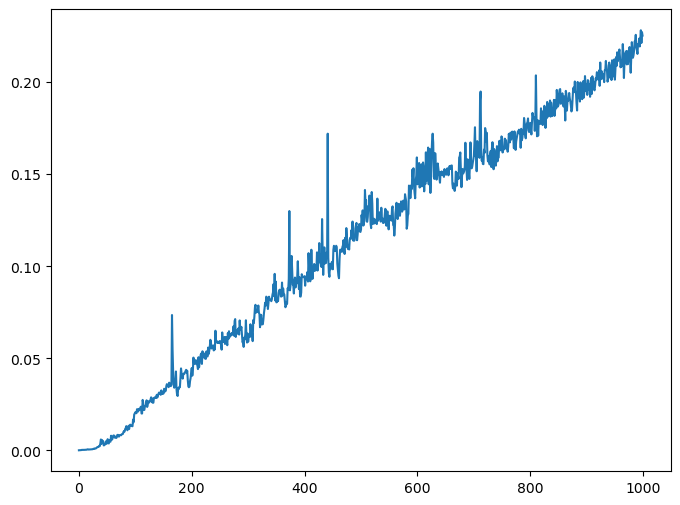

In [50]:
plt.figure(figsize=(8,6))
list_x = range(1000)
list_y = list_computation_time
plt.plot(list_x, list_y);

> The graph can be approximated as a straight line; the algorithm is said to have linear complexity. The computation time linearly depends on the size of the data.
>
> This would not be the case for an algorithm with a double loop, for example. The dependency would be like the power of two of the data size.

## <font color='blus'>Sorting algorithms

### <font color='blus'>Sorting algorithms from `numpy`

Sort of a list with numpy:

`quicksort`: quick sort (default `kind = 'quicksort'`)

`heapsort`: sort (by comparison) by heap

`mergesort`: merge sort

`timsort`: hybrid sort derived from merge sort and insertion sort

In [51]:
len(test_nparray)

1000000

In [52]:
for kind in {'quicksort', 'mergesort', 'heapsort', 'stable'}:# NB : ths is a set
    print(kind)
    %time np.sort(test_nparray, kind=kind)

quicksort
CPU times: user 66.7 ms, sys: 1.66 ms, total: 68.4 ms
Wall time: 70.8 ms
mergesort
CPU times: user 69.3 ms, sys: 2.09 ms, total: 71.4 ms
Wall time: 74.2 ms
stable
CPU times: user 70.4 ms, sys: 2.32 ms, total: 72.7 ms
Wall time: 72 ms
heapsort
CPU times: user 170 ms, sys: 1.07 ms, total: 171 ms
Wall time: 173 ms


In [53]:
import random as rd

In [54]:
LIST_SIZE = 10000
list_ = [i for i in range(0,LIST_SIZE)]
# The list is shuffled for the sort to be valid
liste_a_trier = rd.shuffle(list_)
liste_a_trier = list_
print(len(liste_a_trier), type(liste_a_trier))

10000 <class 'list'>


### <font color='blus'>Bubble sort

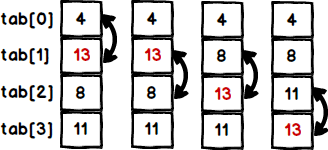

> Bubble sorting consists of traversing the table, for example from left to right, comparing the elements side by side and swapping them if they are not in the correct order.
>
> During a pass of the painting, the largest elements rise gradually to the right like bubbles towards the surface.

In [55]:
list_ = [i for i in range(0,LIST_SIZE)]
liste_a_trier = rd.shuffle(list_)
liste_a_trier = list_

len(liste_a_trier)

10000

In [56]:
liste_a_trier[:None] # Liste entière
liste_a_trier[-2-1]  # Element en 3eme position a partir de la fin de la liste

3253

In [57]:
M = None
len(liste_a_trier[:-1])

9999

> L'implementation est une forme de tri par selection en partant de la fin de la liste.
>
> Partir de la fin impose de rechercher la valeur max de la liste à positioner en fin de liste.

In [58]:
def bubble_sort(liste):
    for i,_ in enumerate(liste):
        # We consider all the elements of the list except the last ones
        # If i is 0, we take the whole list.
        # We get the max value of this list.
        val_max = max(liste[:(-i if i else None)]) # NB: liste[:0] == [] vs liste[:None] == liste
        
        # We get the index of the max value of the truncated list
        ind_val_max = liste.index(val_max)
        
        # The previous -i value and the max value are swapped; the max remote value therefore in the truncated list        liste[-i-1],liste[ind_val_max] = liste[ind_val_max],liste[-i-1]
    return liste

In [59]:
%time liste_triee = bubble_sort(liste_a_trier)

CPU times: user 1.75 s, sys: 10.3 ms, total: 1.77 s
Wall time: 1.85 s


### <font color='blus'>Insertion sort

![alt text](http://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif)

In [60]:
def insertion_sort1(data):
    for r in range(1, len(data)):
        for l in range(r):
            if data[r] < data[l]:
                temp = data[r]
                data[l+1:r+1] = data[l:r]
                data[l] = temp
    return data

In [61]:
%time liste_triee = insertion_sort1(liste_a_trier)

CPU times: user 5.66 s, sys: 19.9 ms, total: 5.68 s
Wall time: 5.7 s


#### <font color='blus'>Some tricks to know

In [62]:
np_ar1 = np.array([1,2,4,5,6])
print(np_ar1)
np_ar_bool = np_ar1 <= 3
print(np_ar_bool)

[1 2 4 5 6]
[ True  True False False False]


> `argmin` will return the index (the list argument) corresponding to the smallest value.
>
> We recover the index of the smallest value <=3, it is the 1st index to False.

In [63]:
(np_ar1 <= 3).argmin()

2

In [64]:
ind_insert= (np_ar1 <= 3).argmin()
ind_insert

2

> Array to be sorted is splited into three parts and is rebuilt using concatenation from numpy `np.concatenate` 
>
> Array partitions are : 
>> - The `True` values part that satisfies condition array <= value_to_be_inserted
>> - The `False` values part that matches with condition array > value_to_be_inserted
>> - The part composed of a single element, value_to_be_inserted (3 here below) matching with element where split takes place.

In [65]:
# Numpy arrays concatenation
np.concatenate( (np_ar1[:ind_insert],np_ar1[ind_insert:ind_insert],np_ar1[ind_insert:]) )

array([1, 2, 4, 5, 6])

> NB : concatenation takes place for arrays. 
> - `np_ar1[ind_insert]` is a value
> - `np_ar1[ind_insert:ind_insert]` is a numpy array

In [66]:
# In the example below, the returned value does not matches with a deterministic value in the sense where the value 8
# does not exists in the array.
(np_ar1 <= 8).argmin() # il faudra traiter ce cas séparément

0

> Building unsorted list that aims to be sorted.

In [67]:
list_shuffled = [i for i in range(0,LIST_SIZE)]
rd.shuffle(list_shuffled)
len(list_shuffled), list_shuffled[23:33]

(10000, [8561, 764, 275, 9184, 8423, 6652, 1545, 1149, 5666, 7895])

In [68]:
from typing import List
def insertion_sort(list_for_sorting): 
    # Initialization of the array to be sorted that includes the 1st element of the array
    np_sorted = np.array(list_for_sorting[:1])
    
    for i,elt in enumerate(list_for_sorting[1:]): 
        j = i+1 # Shift indice because liste[1:] is traversed
        if elt >= np_sorted.max():
            # Add the greatest element at the end of the list
            np_sorted = np.concatenate( (np_sorted[:j],[elt]) )
        else:
            # Element has to be inserted in the sorted list at the right place
            # Search for first smaller element in the sorted list : search for 
            # the smallest element in the sorted array.
            index_of_smallest_elt = (np_sorted[:j] <= elt).argmin()
            
            # Add the element just after values limited with this smallest element
            np_sorted = np.concatenate( (np_sorted[:index_of_smallest_elt], [elt], np_sorted[index_of_smallest_elt:j]) )
    return np_sorted

In [69]:
%time liste_sorted = insertion_sort(list_shuffled)

CPU times: user 252 ms, sys: 12.7 ms, total: 265 ms
Wall time: 267 ms


In [70]:
liste_sorted[-10:]

array([9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999])

> Numpy's `max` method makes the performance difference with Python's standard `max` method.

### <font color='blus'>Comparative study of complexity in time

> The device implemented is identical to that seen previously for `Time measurement of the complexity of an algorithm`
>
> The device will be applied to three algorithms, the measurements will be recorded for each of them and compared on a graph.

In [71]:
LIST_SIZE = 1000

In [72]:
n = int(1e3)
liste_1 = [i for i in range(0,LIST_SIZE)]
rd.shuffle(liste_1)
liste_2 = liste_1.copy()
liste_3 = liste_1.copy()

In [73]:
time_insertion = []
for m in range(100):
    M = 10*(m+1)
    t = Timer('''insertion_sort(liste_2[:{}])'''.format(M),
              "from __main__ import insertion_sort, liste_2")
    time_insertion.append(t.timeit(number=10))

In [74]:
time_insertion1 = []
for m in range(100):
    M = 10*(m+1)
    t = Timer('''insertion_sort1(liste_2[:{}])'''.format(M),
              "from __main__ import insertion_sort1, liste_2")
    time_insertion1.append(t.timeit(number=10))

In [75]:
time_bubble = []
for m in range(100):
    M = 10*(m+1)
    t = Timer('''bubble_sort(liste_3[:{}])'''.format(M),
              "from __main__ import bubble_sort, liste_3")
    time_bubble.append(t.timeit(number=10))

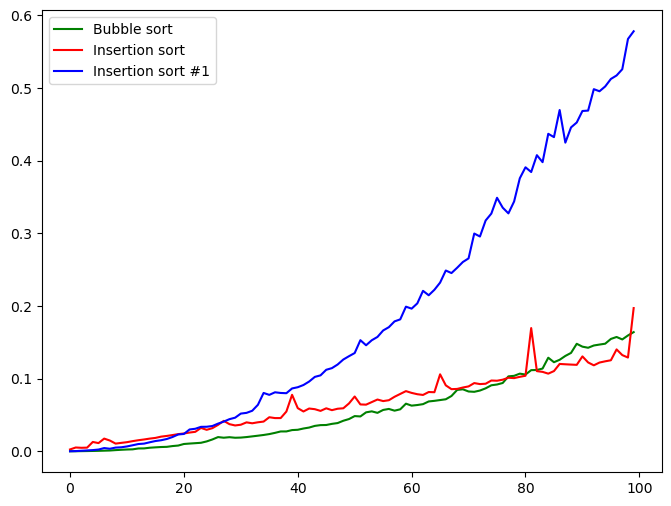

In [76]:
%matplotlib inline
x = range(100)
plt.figure(figsize=(8,6))
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.plot(x, time_insertion1, 'b', label='Insertion sort #1')
plt.legend();

> insertion_sort1 algorithm has $O(t^2)$ time-complexity. This is due to double loop implementation.

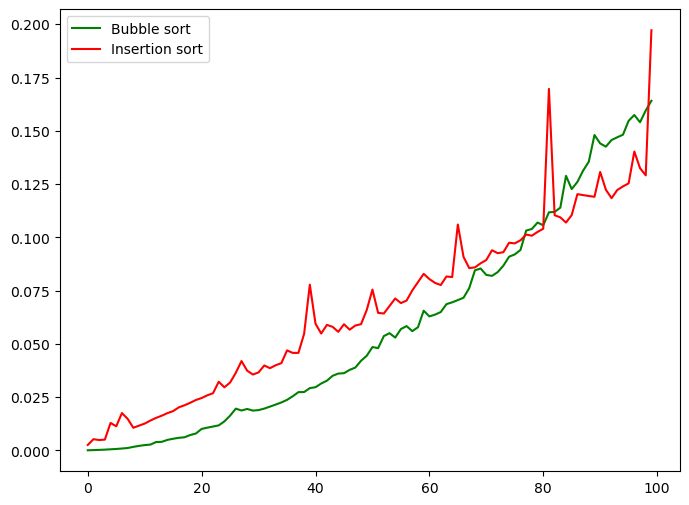

In [77]:
%matplotlib inline
x = range(100)
plt.figure(figsize=(8,6))
plt.plot(x, time_bubble, 'g', label='Bubble sort')
plt.plot(x, time_insertion, 'r', label='Insertion sort')
plt.legend();